## [사이킥런] 위스콘신 유방암 진단
- [위스콘신 유방암 진단 데이터](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)를 이용하여 유방암 여부를 판단하는 머신러닝 예측모델을 수립하고, 여러 평가 지표를 적용해본다.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score,precision_score,recall_score, roc_curve, classification_report,precision_recall_curve
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler, Binarizer, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

import warnings
warnings.filterwarnings(action="ignore")

In [43]:
df = pd.read_csv("Breast Cancer Wisconsin.csv")

In [44]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [45]:
df.shape

(569, 33)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

1. 569개의 레코드 수
2. 32개의 컬럼 수
3. null값 없음
4. 모두 정수형
------------------------------------------------------------
* id: 환자 식별 번호
* diagnosis: 양성 여부(M = 악성, B = 양성)
* radius: 반경(중심에서 외벽까지 거리들의 평균값)
* texture: 질감(Gray~Scale 값들의 표준편차)
* perimeter: 둘레
* area: 면적
* smoothness: 매끄러움(반경길이의 국소적 변화)
* compactness: 조그만 정두(둘레^2/면적 -1)
* concavith: 오목함(윤곽의 오목한 부분의 정도)
* points: 오목한 점의 수
* symmetry: 대칭
* dimension: 프랙탈 차원(해안선근사-1)
* _mean : 평균값(3~12)
* _se: 표준오차(13~22)
* _worst: 각 세포별 구분들에서 제일 큰 3개의 값을 평균낸 값(23~32)

#### M : B => 1 : 0으로 변환

In [48]:
df['diagnosis'] = df['diagnosis'].replace("M", 1)
df['diagnosis'] = df['diagnosis'].replace("B", 0)

In [49]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

#### 필요없는 행 삭제

In [51]:
list = ['Unnamed: 32','id']
X = X.drop(list,axis = 1 )
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### 제로값 확인

In [52]:
for col in X.columns:
    gcnt = X[col][X[col] == 0].count()
    print(col, gcnt, np.round(gcnt / X.shape[0] * 100, 2))

radius_mean 0 0.0
texture_mean 0 0.0
perimeter_mean 0 0.0
area_mean 0 0.0
smoothness_mean 0 0.0
compactness_mean 0 0.0
concavity_mean 13 2.28
concave points_mean 13 2.28
symmetry_mean 0 0.0
fractal_dimension_mean 0 0.0
radius_se 0 0.0
texture_se 0 0.0
perimeter_se 0 0.0
area_se 0 0.0
smoothness_se 0 0.0
compactness_se 0 0.0
concavity_se 13 2.28
concave points_se 13 2.28
symmetry_se 0 0.0
fractal_dimension_se 0 0.0
radius_worst 0 0.0
texture_worst 0 0.0
perimeter_worst 0 0.0
area_worst 0 0.0
smoothness_worst 0 0.0
compactness_worst 0 0.0
concavity_worst 13 2.28
concave points_worst 13 2.28
symmetry_worst 0 0.0
fractal_dimension_worst 0 0.0


concavity(오목함)에서 0이 발견되고 있다.

Number of Benign:  357
Number of Malignant :  212


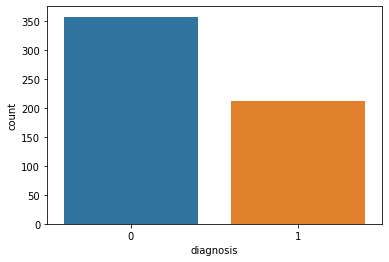

In [53]:
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

진단 결과 악성보단 양성이 많음을 알 수 있다.

In [54]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### 그림으로 나타내기

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'texture_mean'),
  Text(1, 0, 'perimeter_mean'),
  Text(2, 0, 'area_mean'),
  Text(3, 0, 'smoothness_mean'),
  Text(4, 0, 'compactness_mean'),
  Text(5, 0, 'concavity_mean'),
  Text(6, 0, 'concave points_mean'),
  Text(7, 0, 'symmetry_mean'),
  Text(8, 0, 'fractal_dimension_mean'),
  Text(9, 0, 'radius_se')])

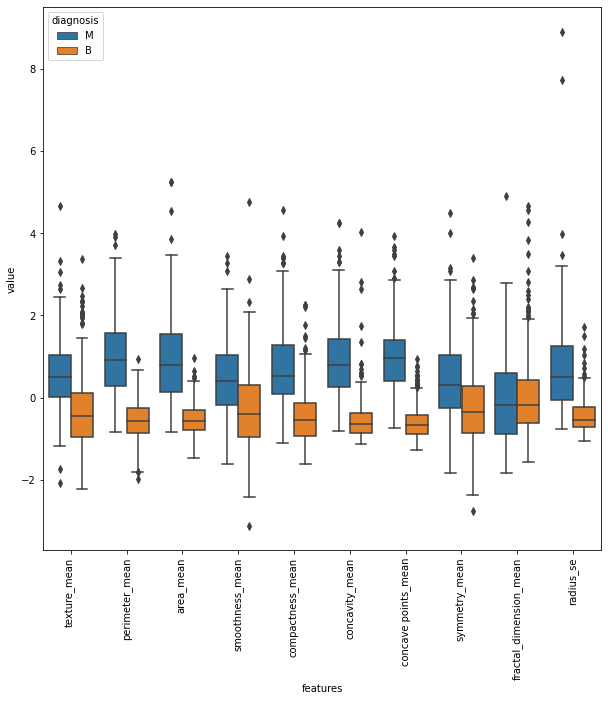

In [12]:
data_dia = y
data = X
data_n_2 = (data - data.mean()) / (data.std())

data = pd.concat([y,data_n_2.iloc[:,1:11]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'texture_se'),
  Text(1, 0, 'perimeter_se'),
  Text(2, 0, 'area_se'),
  Text(3, 0, 'smoothness_se'),
  Text(4, 0, 'compactness_se'),
  Text(5, 0, 'concavity_se'),
  Text(6, 0, 'concave points_se'),
  Text(7, 0, 'symmetry_se'),
  Text(8, 0, 'fractal_dimension_se'),
  Text(9, 0, 'radius_worst')])

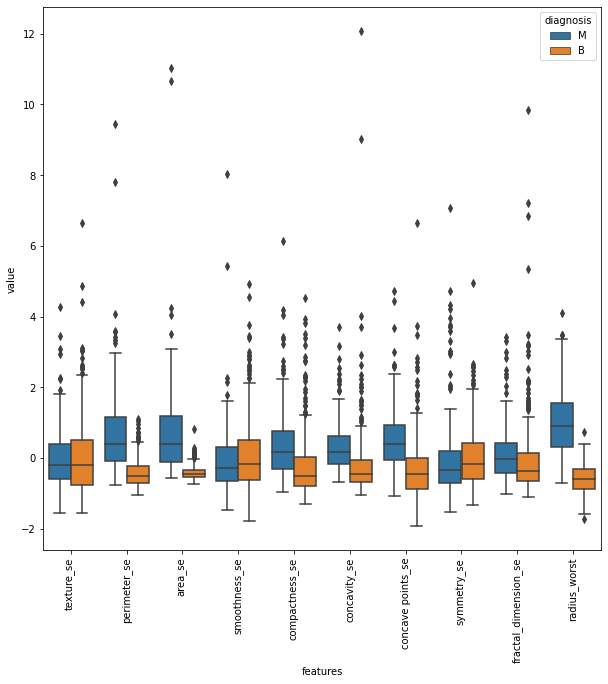

In [13]:
data = pd.concat([y,data_n_2.iloc[:,11:21]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'texture_worst'),
  Text(1, 0, 'perimeter_worst'),
  Text(2, 0, 'area_worst'),
  Text(3, 0, 'smoothness_worst'),
  Text(4, 0, 'compactness_worst'),
  Text(5, 0, 'concavity_worst'),
  Text(6, 0, 'concave points_worst'),
  Text(7, 0, 'symmetry_worst'),
  Text(8, 0, 'fractal_dimension_worst')])

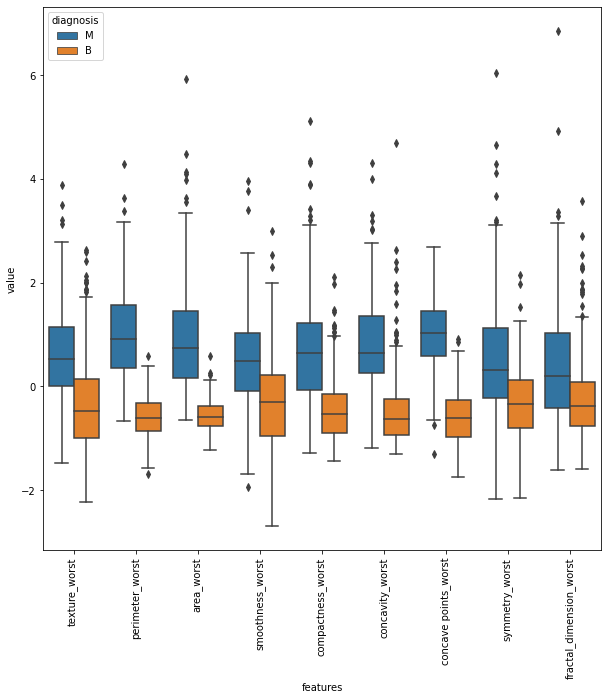

In [14]:
data = pd.concat([y,data_n_2.iloc[:,21:]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

<AxesSubplot:>

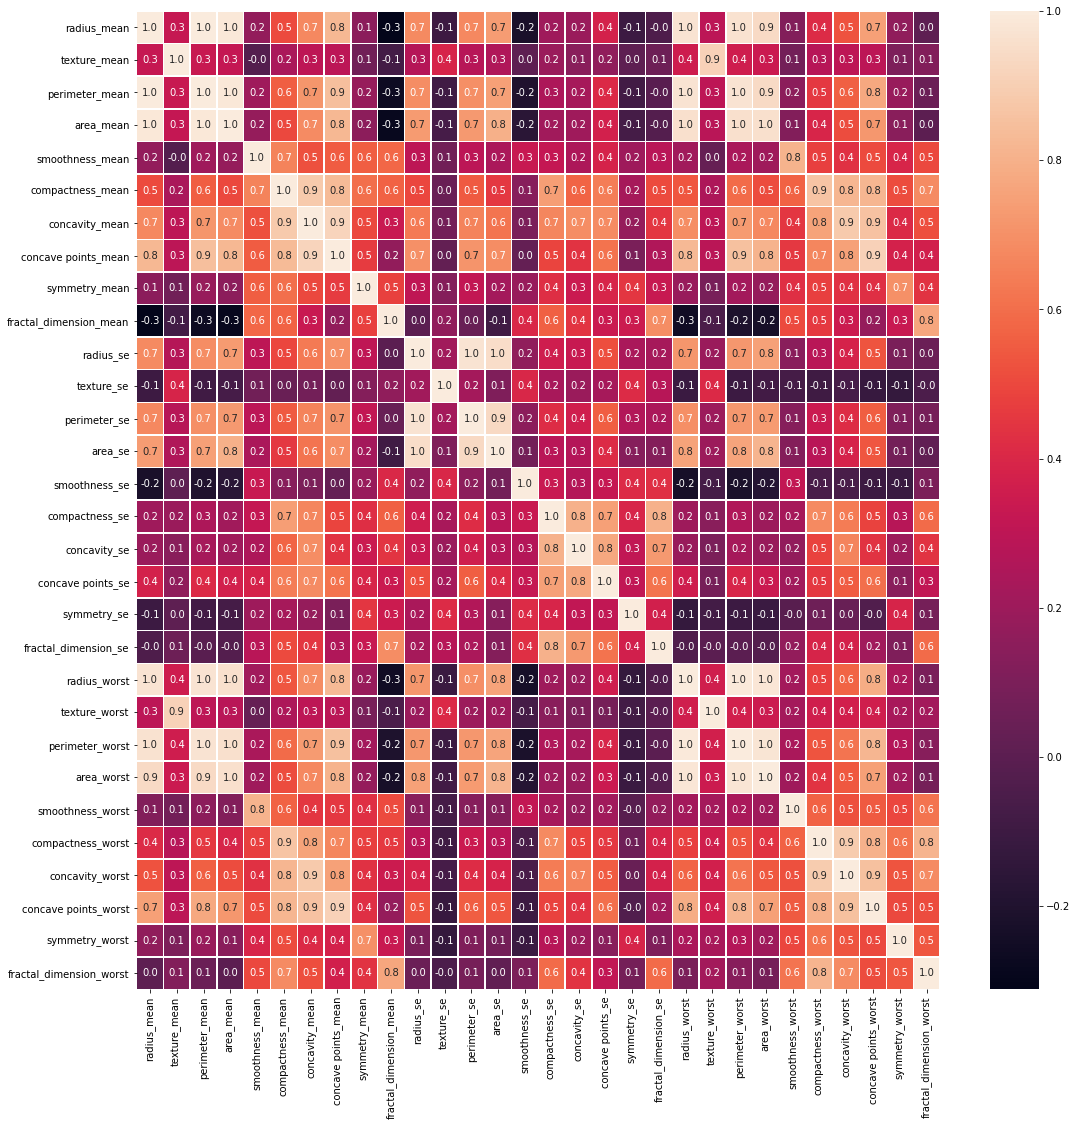

In [15]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

#### 상관도가 높은 항목들 제거
* Compactness_mean, concavity_mean, concave points_mean => **<U>concavity_mean</U>**
* radius_se, perimeter_se, area_se => **<U>area_se</U>** 
* radius_worst, perimeter_worst, area_worst => **<U>area_worst</U>**
* Compactness_worst, concavity_worst, concave points_worst => **<U>concavity_worst</U>**
* Compactness_se, concavity_se, concave points_se => **<U>concavity_se</U>** 
* texture_mean, texture_worst => **<U>texture_mean</U>** 
* area_worst, area_mean => **<U>area_mean</U>**

In [55]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
X_modi = X.drop(drop_list1,axis = 1 )    
X_modi.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


In [56]:
def get_score(y_test, pred):
    acc = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    recall = recall_score(y_test, pred)
    precision = precision_score(y_test, pred)
    rocauc = roc_auc_score(y_test, pred)

    print("정확도:{:.4f}, F1:{:.4f} = (정밀도:{:.4f} + 재현률:{:.4f}), roc-auc:{:.4f}".format(acc, f1, recall, precision, rocauc))
    cf_matrix = confusion_matrix(y_test, pred)
    print(cf_matrix)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_modi, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

pred = rf_model.predict(X_test)

get_score(y_test, pred)

정확도:0.9649, F1:0.9516 = (정밀도:0.9365 + 재현률:0.9672), roc-auc:0.9590
[[106   2]
 [  4  59]]


<AxesSubplot:>

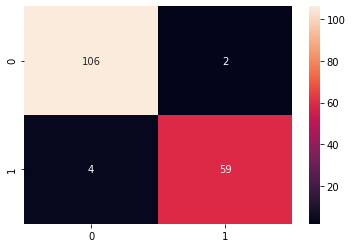

In [58]:
cm = confusion_matrix(y_test,rf_model.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

정확도와 F1점수 모두 거의 95%로 상당히 높은 확률을 보인다.

지금부터는 다른 방법을 사용하여 조금 더 확률을 높여보고자 한다.

#### 스케일링/정규화 : RobustScaler, MinMaxScaler, StandardScaler

In [60]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.2, random_state=121)
rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_test)
get_score(y_test, pred)

정확도:0.9825, F1:0.9778 = (정밀도:1.0000 + 재현률:0.9565), roc-auc:0.9857
[[68  2]
 [ 0 44]]


<AxesSubplot:>

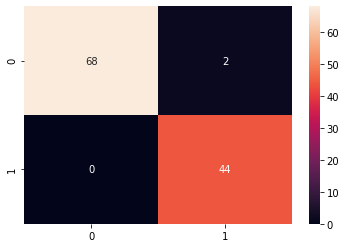

In [61]:
cm = confusion_matrix(y_test,rf_model.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

스케일링 후 정확도와 F1 점수가 올라간 것을 확인하였다.

-------------------문법 공부-------------------

#### precision_recall_curv : 임계치 확인

In [64]:
proba = rf_model.predict_proba(X_test)
print(pred[:10]) 
print(proba[:10])

[1 0 0 0 0 1 0 0 1 1]
[[0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.98 0.02]
 [0.05 0.95]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.   1.  ]]


In [65]:
precision, recall, th = precision_recall_curve(y_test, proba[:,1])
print(len(precision), len(recall), len(th))

18 18 17


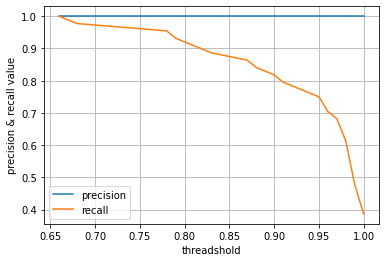

In [66]:
plt.plot(th, precision[:len(th)], label="precision")
plt.plot(th, recall[:len(th)], label="recall")
plt.xlabel("threadshold")
plt.ylabel("precision & recall value")
plt.legend() #plt.legend(["precision", "recall"])
plt.grid()
plt.show()

^^........................................................................ precision_recall_curv는 여기까지만...ㅎ

#### roc_auc_curve : FPR / TPR 비율

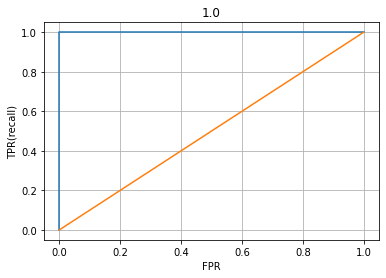

In [67]:
fpr, tpr, th = roc_curve(y_test, proba[:,1])
auc = roc_auc_score(y_test, proba[:, 1].reshape(-1, 1))
plt.plot(fpr, tpr, label='ROC')
plt.plot([0,1], [0,1], label='th:0.5')
plt.title(auc)
plt.xlabel("FPR")
plt.ylabel("TPR(recall)")
plt.grid()
plt.show()

#### 튜닝+학습량 증가

In [62]:
my_hyper_param = {
    "n_estimators"      :[300], 
    "max_depth"         :[3,5,7,9],
    "min_samples_leaf"  :[1,3,5],
}

In [63]:
gcv_model = GridSearchCV(rf_model, param_grid=my_hyper_param, scoring="f1", refit=True, cv=5, verbose=0)

gcv_model.fit(X_train, y_train)

print("best_estimator:", gcv_model.best_estimator_)
print("best_params:",    gcv_model.best_params_)
print("best_score:" ,    gcv_model.best_score_)

best_estimator: RandomForestClassifier(max_depth=5, n_estimators=300)
best_params: {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 300}
best_score: 0.9481571165153255


<튜닝 결과>
* 파라미터 튜닝 결과:   
    'max_depth': 5,   
    'min_samples_leaf': 1,   
    'n_estimators': 300   
    에서 좋은 결과를 보였다.  
    
* 튜닝 하기 전의 점수가 더 높기 때문에 튜닝은 하지 않도록 한다.